### Read in the data

In [179]:
import numpy as np
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

pd.options.display.max_rows = 4000

# Downloading the csv file from your GitHub account, training data
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/allison2368/ABIDE/main/abide_behavioral.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# extract only the Autism group 
# Assuming your DataFrame is named df
# Filter the DataFrame where DX_GROUP is 1
df = df[df['DX_GROUP'] == 1]

# Display the filtered DataFrame
#print(df)
print(df[['ADOS_GOTHAM_SEVERITY']])
len(df)

      ADOS_GOTHAM_SEVERITY
0                  -9999.0
1                  -9999.0
2                  -9999.0
3                  -9999.0
4                  -9999.0
5                  -9999.0
6                  -9999.0
7                  -9999.0
8                  -9999.0
9                  -9999.0
10                 -9999.0
11                 -9999.0
12                 -9999.0
13                 -9999.0
14                 -9999.0
15                 -9999.0
16                 -9999.0
17                 -9999.0
18                 -9999.0
19                 -9999.0
20                 -9999.0
21                 -9999.0
22                 -9999.0
23                 -9999.0
24                 -9999.0
25                 -9999.0
26                 -9999.0
27                 -9999.0
28                 -9999.0
29                 -9999.0
30                 -9999.0
31                 -9999.0
32                 -9999.0
33                 -9999.0
34                 -9999.0
35                 -9999.0
3

539

### Preprocessing

Find where there are actual severity values 

In [180]:

# get the indexes of dataframe where there are severity values
severity = df['ADOS_GOTHAM_SEVERITY']
severity_complete = severity.replace([np.nan], 0)
severity_complete = severity_complete.replace(-9999.0, "na")

severity_list = []
#print(df['ADOS_GOTHAM_SEVERITY'])
for i in severity_complete:
    severity_list.append(i)

print(severity_list)
ind_first = severity_list.index(1.0)
ind_last = severity_list.index(0)
print(ind_first, ind_last)

['na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 'na', 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 7.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 

     ADOS_GOTHAM_SEVERITY
44                    1.0
45                    1.0
46                    1.0
62                    2.0
63                    2.0
64                    2.0
65                    3.0
66                    3.0
67                    3.0
68                    3.0
69                    3.0
70                    3.0
71                    3.0
72                    3.0
73                    3.0
74                    3.0
76                    3.0
77                    4.0
78                    4.0
79                    4.0
80                    4.0
81                    4.0
82                    4.0
83                    4.0
84                    4.0
85                    4.0
86                    4.0
87                    4.0
88                    4.0
89                    4.0
90                    4.0
91                    4.0
92                    4.0
93                    4.0
94                    5.0
95                    5.0
96                    5.0
97          

Text(0.5, 1.0, 'Histogram of ADOS_GOTHAM_SEVERITY')

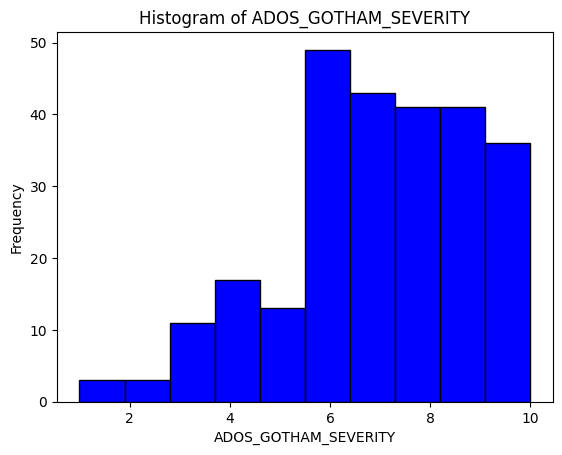

In [181]:
# should be indexes 44 and 317 
df[ind_first:ind_last]

ados_gotham_severity_subset = df.iloc[ind_first:ind_last]['ADOS_GOTHAM_SEVERITY'].copy()

# If you want to create a new DataFrame with only the 'ADOS_GOTHAM_SEVERITY' column
ados_gotham_severity_df = pd.DataFrame(ados_gotham_severity_subset)

print(ados_gotham_severity_df)

# Plot histogram
plt.hist(ados_gotham_severity_df['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')


Remove unnamed columns and mixed type columns 

In [171]:
# now we should preprocess the data
# remove the columns that are unnamed 
df_new = df.drop(columns=['Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77', 'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80'])

# look at the data types of columns
#print(df_new.dtypes)

# remove these columns becuase they are categorical and numerical: 
# COMORBIDITY MEDICATION_NAME	OFF_STIMULANTS_AT_SCAN	VINELAND_RECEPTIVE_V_SCALED	VINELAND_EXPRESSIVE_V_SCALED	VINELAND_WRITTEN_V_SCALED
df_new = df_new.drop(columns=['CURRENT_MED_STATUS','VINELAND_COMMUNICATION_STANDARD','VINELAND_PERSONAL_V_SCALED',	'VINELAND_DOMESTIC_V_SCALED',	'VINELAND_COMMUNITY_V_SCALED',	'VINELAND_DAILYLVNG_STANDARD','SITE_ID','COMORBIDITY', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED'])
# encode these variables:fit, 
# viq, piq, sex, handiness category DX_GROUP	DSM_IV_TR research reliable, ados module 
print(df_new.dtypes)

for col in df_new.columns:
    if df_new[col].dtype == 'object':
        df_new[col] = df_new[col].str.lower()



SUB_ID                               int64
DX_GROUP                             int64
DSM_IV_TR                            int64
AGE_AT_SCAN                        float64
SEX                                  int64
HANDEDNESS_CATEGORY                 object
HANDEDNESS_SCORES                  float64
FIQ                                float64
VIQ                                float64
PIQ                                float64
FIQ_TEST_TYPE                       object
VIQ_TEST_TYPE                       object
PIQ_TEST_TYPE                       object
ADI_R_SOCIAL_TOTAL_A               float64
ADI_R_VERBAL_TOTAL_BV              float64
ADI_RRB_TOTAL_C                    float64
ADI_R_ONSET_TOTAL_D                float64
ADI_R_RSRCH_RELIABLE               float64
ADOS_MODULE                        float64
ADOS_TOTAL                         float64
ADOS_COMM                          float64
ADOS_SOCIAL                        float64
ADOS_STEREO_BEHAV                  float64
ADOS_RSRCH_

Replace -9999 values with NA, encode the categorical variables 

In [182]:
## change the -9999 values to na 

pd.options.display.max_rows = 4000
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame variable
# Replace -9999 with NaN
df_new = df_new.mask(df == -9999, np.nan)


# one hot encode 
one_hot_encoded_data = pd.get_dummies(df_new, columns = ['ADOS_MODULE', 'DX_GROUP','ADI_R_RSRCH_RELIABLE', 'SEX', 'VIQ_TEST_TYPE', 'FIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'DSM_IV_TR', 'HANDEDNESS_CATEGORY']) 
for i in one_hot_encoded_data:
	print(i)


# Initialize a flag to check if any string values exist
string_values_exist = False

# Iterate over each column
for column in one_hot_encoded_data.columns:
    # Check if the column dtype is object (which typically represents strings)
    if one_hot_encoded_data[column].dtype == 'object':
        # Check if any value in the column is a string
        if one_hot_encoded_data[column].apply(lambda x: isinstance(x, str)).any():
            print(f"String values exist in column '{column}'.")
            string_values_exist = True

# If no string values were found, print a message
if not string_values_exist:
    print("No string values found in any column.")


SUB_ID
AGE_AT_SCAN
HANDEDNESS_SCORES
FIQ
VIQ
PIQ
ADI_R_SOCIAL_TOTAL_A
ADI_R_VERBAL_TOTAL_BV
ADI_RRB_TOTAL_C
ADI_R_ONSET_TOTAL_D
ADOS_TOTAL
ADOS_COMM
ADOS_SOCIAL
ADOS_STEREO_BEHAV
ADOS_RSRCH_RELIABLE
ADOS_GOTHAM_SOCAFFECT
ADOS_GOTHAM_RRB
ADOS_GOTHAM_TOTAL
ADOS_GOTHAM_SEVERITY
SRS_VERSION
SRS_RAW_TOTAL
SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
SCQ_TOTAL
AQ_TOTAL
VINELAND_INTERPERSONAL_V_SCALED
VINELAND_PLAY_V_SCALED
VINELAND_COPING_V_SCALED
VINELAND_SOCIAL_STANDARD
VINELAND_SUM_SCORES
VINELAND_ABC_STANDARD
VINELAND_INFORMANT
WISC_IV_VCI
WISC_IV_PRI
WISC_IV_WMI
WISC_IV_PSI
WISC_IV_SIM_SCALED
WISC_IV_VOCAB_SCALED
WISC_IV_INFO_SCALED
WISC_IV_BLK_DSN_SCALED
WISC_IV_PIC_CON_SCALED
WISC_IV_MATRIX_SCALED
WISC_IV_DIGIT_SPAN_SCALED
WISC_IV_LET_NUM_SCALED
WISC_IV_CODING_SCALED
WISC_IV_SYM_SCALED
EYE_STATUS_AT_SCAN
AGE_AT_MPRAGE
BMI
ADOS_MODULE_2.0
ADOS_MODULE_3.0
ADOS_MODULE_4.0
DX_GROUP_1
ADI_R_RSRCH_RELIABLE_0.0
ADI_R_RSRCH_RELIABLE_1.0
SEX_1
SEX_2
VIQ_TEST_TYPE

### Try imputing the data without scaling first

This is with unscaled data 

In [183]:

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_3 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_3['ADOS_GOTHAM_SEVERITY'])

# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_1 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_1['ADOS_GOTHAM_SEVERITY'])



# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=5)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_5 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_5['ADOS_GOTHAM_SEVERITY'])


# look into the steps of knn imputer 
# how does it work with NA values?
imputer = KNNImputer(n_neighbors=10)
# Convert the DataFrame to a NumPy array
data_array = one_hot_encoded_data.values

# Fit the imputer to the data and transform it
imputed_data_array = imputer.fit_transform(data_array)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_10 = pd.DataFrame(imputed_data_array, columns=one_hot_encoded_data.columns)
print(imputed_df_10['ADOS_GOTHAM_SEVERITY'])




0       8.666667
1       6.000000
2       7.666667
3       7.666667
4       6.666667
5       7.666667
6       6.666667
7       8.333333
8       6.333333
9       7.666667
10      8.000000
11      6.000000
12      7.666667
13      8.333333
14      7.333333
15      8.000000
16      6.333333
17      8.666667
18      8.666667
19      7.000000
20      7.333333
21      7.333333
22      8.000000
23      8.666667
24      7.666667
25      8.000000
26      7.333333
27      8.000000
28      9.000000
29      8.000000
30      6.666667
31      7.333333
32      8.666667
33      7.000000
34      4.333333
35      5.666667
36      8.000000
37      7.000000
38      7.000000
39      9.000000
40      7.333333
41      6.333333
42      6.000000
43      5.666667
44      1.000000
45      1.000000
46      1.000000
47      2.000000
48      2.000000
49      2.000000
50      3.000000
51      3.000000
52      3.000000
53      3.000000
54      3.000000
55      3.000000
56      3.000000
57      3.000000
58      3.0000

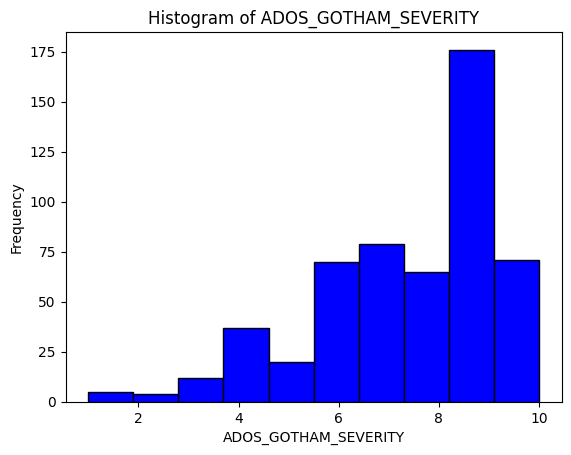

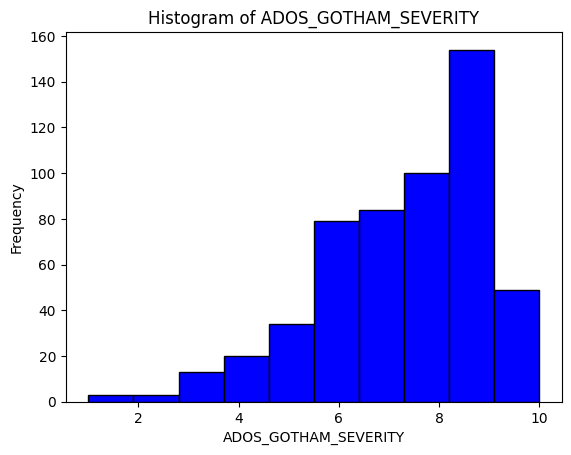

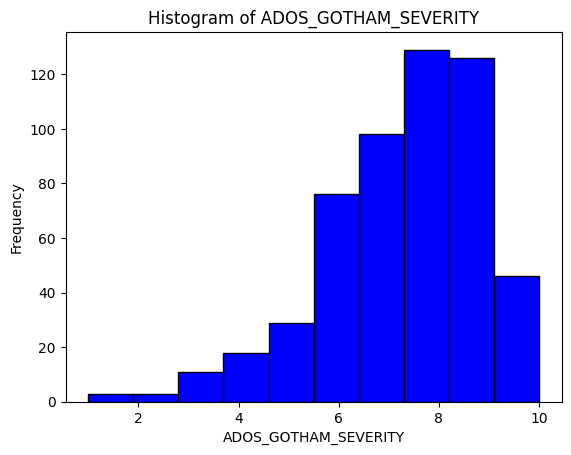

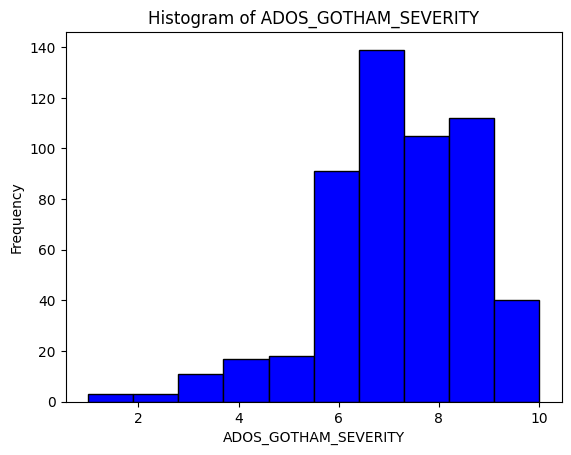

In [184]:


# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_1['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


# second histogram 

# Plot histogram
plt.hist(imputed_df_3['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()

# third histogram 

# Plot histogram
plt.hist(imputed_df_5['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


# fourth histogram 

# Plot histogram
plt.hist(imputed_df_10['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()

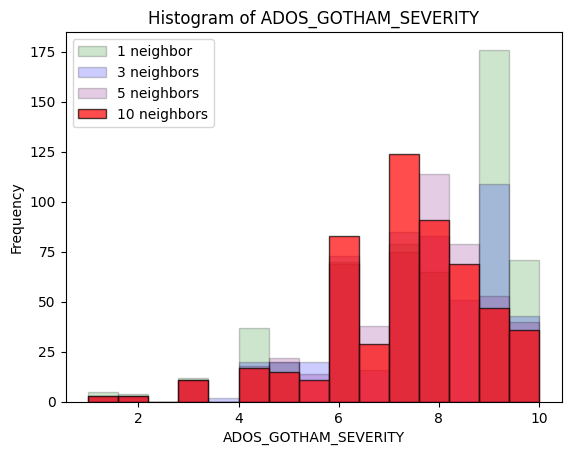

In [106]:
import matplotlib.pyplot as plt

# Plot first histogram
plt.hist(imputed_df_1['ADOS_GOTHAM_SEVERITY'], bins=15, color='green', edgecolor='black', alpha=0.2, label='1 neighbor')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_3['ADOS_GOTHAM_SEVERITY'], bins=15, color='blue', edgecolor='black', alpha=0.2, label='3 neighbors')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_5['ADOS_GOTHAM_SEVERITY'], bins=15, color='purple', edgecolor='black', alpha=0.2, label='5 neighbors')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_10['ADOS_GOTHAM_SEVERITY'], bins=15, color='red', edgecolor='black', alpha=0.7, label='10 neighbors')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
plt.legend()

# Show plot
plt.show()


look at one sample and how it changes 

for the cross validation, check each severity type 

In [9]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error

# Extract the 'ADOS_GOTHAM_SEVERITY' column
target_column = 'ADOS_GOTHAM_SEVERITY'
target_data = one_hot_encoded_data[[target_column]]

# Initialize KNN Imputer with a specific number of neighbors
imputer = KNNImputer(n_neighbors=3)

# Impute the 'ADOS_GOTHAM_SEVERITY' column
imputed_target = imputer.fit_transform(target_data)

# Perform cross-validation on the imputed 'ADOS_GOTHAM_SEVERITY' column
scores = cross_val_score(imputer, target_data, cv=5, scoring='neg_mean_squared_error')

# Calculate the mean cross-validation score
mean_score = -np.mean(scores)  # Multiply by -1 because scoring returns negative MSE

print("Mean cross-validation score for 'ADOS_GOTHAM_SEVERITY':", mean_score)


Mean cross-validation score for 'ADOS_GOTHAM_SEVERITY': nan


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = scorer._score(
            ^^^^^^^^^^^^^^
TypeError: _Scorer._score() missing 1 required positional argument: 'y_true'

  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:1006: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_scorer.py", line 137, in __call__
    score = sco

### min max scaling 

     ADOS_GOTHAM_SEVERITY
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8                     NaN
9                     NaN
10                    NaN
11                    NaN
12                    NaN
13                    NaN
14                    NaN
15                    NaN
16                    NaN
17                    NaN
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    NaN
23                    NaN
24                    NaN
25                    NaN
26                    NaN
27                    NaN
28                    NaN
29                    NaN
30                    NaN
31                    NaN
32                    NaN
33                    NaN
34                    NaN
35                    NaN
36                    NaN
37          

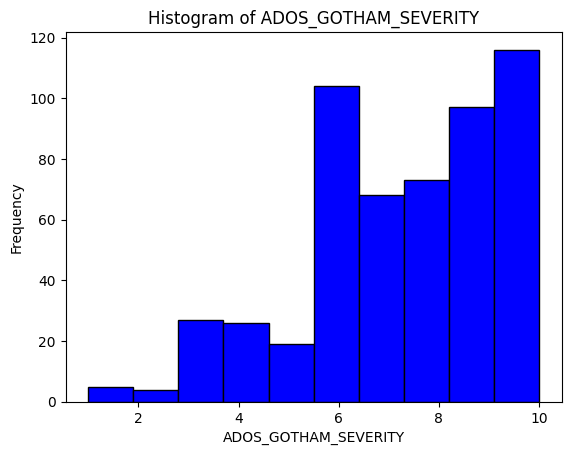

In [185]:
from sklearn.preprocessing import MinMaxScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)


# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values


print(scaled_df.iloc[:,-1:])

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have imputed_df DataFrame created

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


since the graph looks a little off, we want to try out different columns to see what is affecting the skew 

In [11]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled_4 = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled_4['ADOS_GOTHAM_SEVERITY'])

import pandas as pd
import matplotlib.pyplot as plt

# # Assuming you already have imputed_df DataFrame created
# 
# # Plot histogram
# plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')
# 
# # Add labels and title
# plt.xlabel('ADOS_GOTHAM_SEVERITY')
# plt.ylabel('Frequency')
# plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
# 
# # Show plot
# plt.show()



     AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_GOTHAM_SEVERITY
0       0.277368  0.719626  0.558333  0.630435                   NaN
1       0.557193  0.682243  0.683333  0.478261                   NaN
2       0.316140  0.476636  0.491667  0.340580                   NaN
3       0.305439  0.532710  0.425000  0.478261                   NaN
4       0.142807  0.626168  0.650000  0.420290                   NaN
5       0.190877  0.663551  0.591667  0.514493                   NaN
6       0.151930  0.570093  0.591667  0.384058                   NaN
7       0.170877  0.635514  0.683333  0.405797                   NaN
8       0.154561  0.551402  0.625000  0.340580                   NaN
9       0.162632  0.766355  0.600000  0.644928                   NaN
10      0.132105  0.504673  0.425000  0.434783                   NaN
11      0.403158  0.598131  0.550000  0.456522                   NaN
12      0.280526  0.869159  0.725000  0.681159                   NaN
13      0.263860  0.897196  0.7666

In [12]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL', 'BMI', 'SEX_1', 'SEX_2']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL',  'BMI', 'SEX_1', 'SEX_2', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled_10 = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled_10['ADOS_GOTHAM_SEVERITY'])

# import pandas as pd
# import matplotlib.pyplot as plt
# 
# # Assuming you already have imputed_df DataFrame created
# 
# # Plot histogram
# plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')
# 
# # Add labels and title
# plt.xlabel('ADOS_GOTHAM_SEVERITY')
# plt.ylabel('Frequency')
# plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
# 
# # Show plot
# plt.show()



     AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_TOTAL  ADOS_COMM  \
0       0.277368  0.719626  0.558333  0.630435        0.20      0.250   
1       0.557193  0.682243  0.683333  0.478261        0.30      0.375   
2       0.316140  0.476636  0.491667  0.340580        0.40      0.250   
3       0.305439  0.532710  0.425000  0.478261        0.65      0.375   
4       0.142807  0.626168  0.650000  0.420290        0.40      0.375   
5       0.190877  0.663551  0.591667  0.514493        0.50      0.625   
6       0.151930  0.570093  0.591667  0.384058        0.65      0.625   
7       0.170877  0.635514  0.683333  0.405797        0.15      0.375   
8       0.154561  0.551402  0.625000  0.340580        0.75      0.625   
9       0.162632  0.766355  0.600000  0.644928        0.65      0.500   
10      0.132105  0.504673  0.425000  0.434783        0.45      0.375   
11      0.403158  0.598131  0.550000  0.456522        0.30      0.625   
12      0.280526  0.869159  0.725000  0.681159     

In [110]:
# we first try 4 columns and scale those 
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL', 'BMI', 'SEX_1', 'SEX_2', 'HANDEDNESS_SCORES', 'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION','SRS_COMMUNICATION','SRS_MOTIVATION','SRS_MANNERISMS','SCQ_TOTAL']

adjusted_df = one_hot_encoded_data_without_severity[columns]
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(adjusted_df)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns = columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)

# i want to impute the data, use sklearn knn imputer 
# only works with numpy array
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=1)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
columns = ['AGE_AT_SCAN','FIQ', 'PIQ', 'VIQ','ADOS_TOTAL','ADOS_COMM','ADOS_SOCIAL', 'BMI', 'SEX_1', 'SEX_2', 'HANDEDNESS_SCORES', 'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION','SRS_COMMUNICATION','SRS_MOTIVATION','SRS_MANNERISMS','SCQ_TOTAL', 'ADOS_GOTHAM_SEVERITY']
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled_18 = pd.DataFrame(imputed_data_array_scaled, columns=columns)
print(imputed_df_scaled_18['ADOS_GOTHAM_SEVERITY'])

# import pandas as pd
# import matplotlib.pyplot as plt
# 
# # Assuming you already have imputed_df DataFrame created
# 
# # Plot histogram
# plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')
# 
# # Add labels and title
# plt.xlabel('ADOS_GOTHAM_SEVERITY')
# plt.ylabel('Frequency')
# plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
# 
# # Show plot
# plt.show()



     AGE_AT_SCAN       FIQ       PIQ       VIQ  ADOS_TOTAL  ADOS_COMM  \
0       0.277368  0.719626  0.558333  0.630435        0.20      0.250   
1       0.557193  0.682243  0.683333  0.478261        0.30      0.375   
2       0.316140  0.476636  0.491667  0.340580        0.40      0.250   
3       0.305439  0.532710  0.425000  0.478261        0.65      0.375   
4       0.142807  0.626168  0.650000  0.420290        0.40      0.375   
5       0.190877  0.663551  0.591667  0.514493        0.50      0.625   
6       0.151930  0.570093  0.591667  0.384058        0.65      0.625   
7       0.170877  0.635514  0.683333  0.405797        0.15      0.375   
8       0.154561  0.551402  0.625000  0.340580        0.75      0.625   
9       0.162632  0.766355  0.600000  0.644928        0.65      0.500   
10      0.132105  0.504673  0.425000  0.434783        0.45      0.375   
11      0.403158  0.598131  0.550000  0.456522        0.30      0.625   
12      0.280526  0.869159  0.725000  0.681159     

putting different added columns together to see if it makes a difference to remove certain columns/is it affecting the skew of the imputed data?

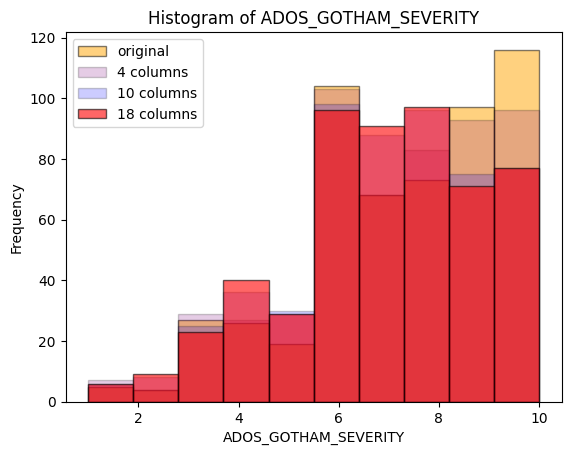

Text(0.5, 1.0, 'Histogram of ADOS_GOTHAM_SEVERITY')

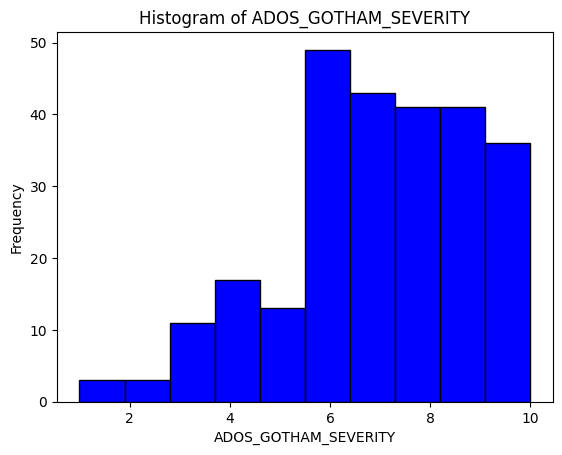

In [14]:
import matplotlib.pyplot as plt

# Plot first histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='orange', edgecolor='black', alpha=0.5, label='original')
# Plot second histogram overlaid on the first
plt.hist(imputed_df_scaled_4['ADOS_GOTHAM_SEVERITY'], bins=10, color='purple', edgecolor='black', alpha=0.2, label='4 columns')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_scaled_10['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black', alpha=0.2, label='10 columns')

# Plot second histogram overlaid on the first
plt.hist(imputed_df_scaled_18['ADOS_GOTHAM_SEVERITY'], bins=10, color='red', edgecolor='black', alpha=0.6, label='18 columns')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')
plt.legend()

# Show plot
plt.show()

# Plot histogram
plt.hist(ados_gotham_severity_df['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')


# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')


Testing with standard scaler instead

       SUB_ID  AGE_AT_SCAN  HANDEDNESS_SCORES       FIQ       VIQ       PIQ  \
0    0.516468     0.693515           0.197030  0.744873  1.383990 -0.065788   
1    0.518703     2.601716           0.874196  0.509419  0.219702  0.810114   
2    0.520938     0.957911           0.691178 -0.785576 -0.833701 -0.532936   
3    0.523173     0.884933           0.709480 -0.432396  0.219702 -1.000084   
4    0.532113    -0.224096           0.709480  0.156239 -0.223836  0.576540   
5    0.547759     0.103707           0.544764  0.391693  0.496914  0.167786   
6    0.594694    -0.161886           0.544764 -0.196942 -0.501047  0.167786   
7    0.596929    -0.032678           0.416651  0.215102 -0.334721  0.810114   
8    0.599164    -0.143940          -1.816168 -0.314669 -0.833701  0.401360   
9    0.601399    -0.088907          -1.559943  1.039190  1.494874  0.226179   
10   0.605870    -0.297075          -0.955984 -0.608986 -0.112951 -1.000084   
11   0.641630     1.551308           0.434953 -0.020

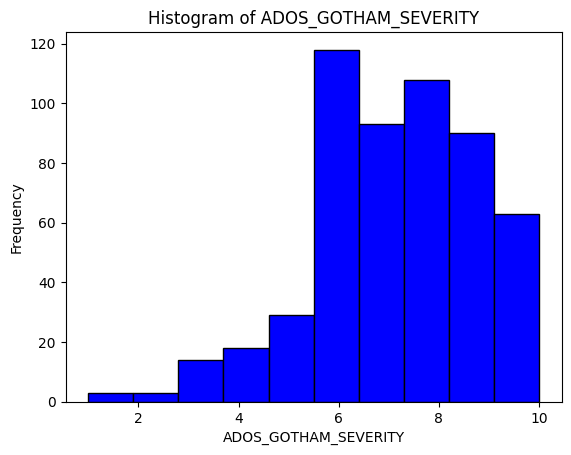

In [109]:
from sklearn.preprocessing import StandardScaler

# Assuming you have a DataFrame called one_hot_encoded_data
# Assuming you have a variable called 'severity_column' storing the 'ADOS_GOTHAM_SEVERITY' column
severity_column = one_hot_encoded_data['ADOS_GOTHAM_SEVERITY']
# Remove the 'ADOS_GOTHAM_SEVERITY' column
one_hot_encoded_data_without_severity = one_hot_encoded_data.drop('ADOS_GOTHAM_SEVERITY', axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the remaining data frame
scaled_data = scaler.fit_transform(one_hot_encoded_data_without_severity)

# Convert the scaled array back to a DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=one_hot_encoded_data_without_severity.columns)

# Attach the 'ADOS_GOTHAM_SEVERITY' column back to the scaled DataFrame
scaled_df['ADOS_GOTHAM_SEVERITY'] = severity_column.values

# Display the modified DataFrame
print(scaled_df)


# Impute the data using sklearn KNNImputer 
# KNNImputer only works with numpy array

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array_scaled = scaled_df.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])

import matplotlib.pyplot as plt

# Plot histogram
plt.hist(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'], bins=10, color='blue', edgecolor='black')

# Add labels and title
plt.xlabel('ADOS_GOTHAM_SEVERITY')
plt.ylabel('Frequency')
plt.title('Histogram of ADOS_GOTHAM_SEVERITY')

# Show plot
plt.show()


test the columns to see which ones are affecting the scaling 

figure out knn is handling missing values - how it imputes the actual score 
figure out why the different scaling methods have different results, plot the different distributions
how to use cross validation to pick the best k and state why its the best - do it for each severity 
how to visualize? combine plots

### CROSS VALIDATION 

In [48]:
# check the scaling methods: does it accurately predict the data that is already there ??
# y_true = scaled_df
# print(y_true.shape)
# copy_df = y_true.copy()
# 
# copy_df['ADOS_GOTHAM_SEVERITY'] = np.nan
# copy_df.loc[[0,107],'ADOS_GOTHAM_SEVERITY'] = 0
# copy_df is to impute 
# Function to calculate RMSE between original and imputed data
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))
rmse_scores = []
from sklearn.impute import KNNImputer
y_true = scaled_df
#for i in range(1,10):
copy_df = y_true.copy()
copy_df['ADOS_GOTHAM_SEVERITY'] = np.nan
copy_df.loc[[0,107],'ADOS_GOTHAM_SEVERITY'] = 1
imputer = KNNImputer(n_neighbors=3)
# Convert the DataFrame to a NumPy array
data_array_scaled = copy_df.values
# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)
# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=y_true.columns)
imputed_df_scaled = imputed_df_scaled[ind_first:ind_last]
y_true = y_true[ind_first:ind_last]
print(y_true['ADOS_GOTHAM_SEVERITY'])
print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'])
# Calculate RMSE between original and imputed data
rmse_scores.append(rmse(y_true[['ADOS_GOTHAM_SEVERITY']], imputed_df_scaled[['ADOS_GOTHAM_SEVERITY']]))


print(rmse_scores)   
#     # Cross-validate imputation accuracy
# cv_scores = cross_val_score(imputer, df, df, cv=cv, scoring='neg_mean_squared_error')
# cv_rmse_scores = np.sqrt(-cv_scores)
# Visualize the number of neighbors vs RMSE
# plt.plot(range(1,11), rmse_scores, marker='o')
# plt.title('Number of Neighbors vs RMSE')
# plt.xlabel('Number of Neighbors')
# plt.ylabel('RMSE')
# plt.xticks(range(1,11))
# plt.grid(True)
# plt.show()

    

44      1.0
45      1.0
46      1.0
47      2.0
48      2.0
49      2.0
50      3.0
51      3.0
52      3.0
53      3.0
54      3.0
55      3.0
56      3.0
57      3.0
58      3.0
59      3.0
60      3.0
61      4.0
62      4.0
63      4.0
64      4.0
65      4.0
66      4.0
67      4.0
68      4.0
69      4.0
70      4.0
71      4.0
72      4.0
73      4.0
74      4.0
75      4.0
76      4.0
77      4.0
78      5.0
79      5.0
80      5.0
81      5.0
82      5.0
83      5.0
84      5.0
85      5.0
86      5.0
87      5.0
88      5.0
89      5.0
90      5.0
91      6.0
92      6.0
93      6.0
94      6.0
95      6.0
96      6.0
97      6.0
98      6.0
99      6.0
100     6.0
101     6.0
102     6.0
103     6.0
104     6.0
105     6.0
106     6.0
107     6.0
108     6.0
109     6.0
110     6.0
111     6.0
112     6.0
113     6.0
114     6.0
115     6.0
116     6.0
117     6.0
118     6.0
119     6.0
120     6.0
121     6.0
122     6.0
123     6.0
124     6.0
125     6.0
126     6.0
127 

In [28]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Function to calculate RMSE between original and imputed data
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# Function to evaluate KNN imputer accuracy using cross-validation
def evaluate_knn_imputer(y_true, n_neighbors_range, cv=5):
    rmse_scores = []

    for k in n_neighbors_range:
        # Create a KNN imputer
        imputer = KNNImputer(n_neighbors=k)

        # Fit the imputer to the data and transform it
        imputed_data = imputer.fit_transform(y_true)

        # Convert the imputed NumPy array back to a DataFrame
        imputed_df = pd.DataFrame(imputed_data, columns=y_true.columns)

        # Calculate RMSE between original and imputed data
        rmse_score = rmse(y_true, imputed_df)
        rmse_scores.append(rmse_score)

    return rmse_scores

# Example usage
# Assuming 'y_true' is your original scaled dataframe

# Create a copy of the dataframe with NaN values in ADOS_GOTHAM_SEVERITY column
copy_df = y_true.copy()
copy_df['ADOS_GOTHAM_SEVERITY'] = np.nan
copy_df.loc[[0,107],'ADOS_GOTHAM_SEVERITY'] = 0

# Set the range of neighbors for evaluation
n_neighbors_range = range(1, 11)  # Evaluate for neighbors from 1 to 10

# Evaluate KNN imputer accuracy using cross-validation
rmse_scores = evaluate_knn_imputer(copy_df, n_neighbors_range)

# Visualize the number of neighbors vs RMSE
plt.plot(n_neighbors_range, rmse_scores, marker='o')
plt.title('Number of Neighbors vs RMSE')
plt.xlabel('Number of Neighbors')
plt.ylabel('RMSE')
plt.xticks(n_neighbors_range)
plt.grid(True)
plt.show()


KeyError: '[0] not in index'

In [19]:
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your data is stored in X (features) and y (target variable)
# X should have missing values in the target variable

X = scaled_df.drop('ADOS_GOTHAM_SEVERITY', axis=1)
print(X.index)
y = scaled_df['ADOS_GOTHAM_SEVERITY']
# Define KNN imputer
knn_imputer = KNNImputer()

# Define cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define percentage of values to remove
percent_to_remove = 0.2  # Example: 20% of values to be removed

# Iterate over cross-validation folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y[test_index]
    
    # Simulate missing values
    missing_indices = np.random.choice(len(y_train), int(len(y_train) * percent_to_remove), replace=False)
    y_train_missing = y_train.copy()
    y_train_missing[missing_indices] = np.nan
    
    # Impute missing values
    X_train_imputed = knn_imputer.fit_transform(X_train)  # Assuming features have missing values as well
    y_train_imputed = knn_imputer.fit_transform(y_train_missing.reshape(-1, 1)).ravel()
    
    # Evaluate accuracy
    y_test_imputed = knn_imputer.transform(y_test.reshape(-1, 1)).ravel()
    accuracy = accuracy_score(y_test, y_test_imputed)
    
    print("Accuracy:", accuracy)



RangeIndex(start=0, stop=539, step=1)


KeyError: "None of [Int64Index([  1,   3,   4,   5,   7,   8,  12,  13,  14,  16,\n            ...\n            523, 524, 526, 528, 529, 530, 531, 533, 535, 536],\n           dtype='int64', length=431)] are in the [columns]"

In [24]:
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your data is stored in df (DataFrame) and the target variable is 'target_column'
# df should have missing values in the target variable
df = scaled_df[ind_first:ind_last]

# Define KNN imputer
knn_imputer = KNNImputer()

# Define cross-validation iterator
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Define percentage of values to remove
percent_to_remove = 0.4  # Example: 20% of values to be removed

# Iterate over cross-validation folds
for train_index, test_index in kf.split(df):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]
    y_test = df_test['ADOS_GOTHAM_SEVERITY']
    
    # Simulate missing values
    missing_indices = np.random.choice(len(y_train), int(len(y_train) * percent_to_remove), replace=False)
    df_train_copy = df_train.copy()
    df_train_copy['ADOS_GOTHAM_SEVERITY'].iloc[missing_indices] = np.nan
    
    # Impute missing values
    df_train_imputed = knn_imputer.fit_transform(df_train)  # Assuming features have missing values as well
    y_train_imputed = df_train_imputed['ADOS_GOTHAM_SEVERITY']
    
    # Evaluate accuracy
    y_test_imputed = knn_imputer.transform(y_test.values.reshape(-1, 1)).ravel()
    accuracy = accuracy_score(y_test, y_test_imputed)
    
    print("Accuracy:", accuracy)


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [29]:
!pip install --upgrade pip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 410.0 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: pip
    Found existing installation: pip 23.3.1
    Uninstalling pip-23.3.1:
      Successfully uninstalled pip-23.3.1


In [30]:
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming your data is stored in df (DataFrame) and the target variable is 'target_column'
# df should have missing values in the target variable
df = scaled_df[ind_first:ind_last]
# Define KNN imputer
knn_imputer = KNNImputer()

# Define cross-validation parameters
num_sections = 5  # Number of sections to split the data
percent_to_remove = 0.1  # Percentage of data points to remove from the test portion

# Calculate the size of each section
section_size = len(df) // num_sections

# Iterate over sections
for section_start in range(0, len(df), section_size):
    section_end = min(section_start + section_size, len(df))
    
    # Split the data into reference and test portions
    reference_df = pd.concat([df.iloc[:section_start], df.iloc[section_end:]])
    test_df = df.iloc[section_start:section_end]
    
    # Randomly remove some data points from the test portion
    num_points_to_remove = int(len(test_df) * percent_to_remove)
    removed_indices = np.random.choice(len(test_df), num_points_to_remove, replace=False)
    test_df_missing = test_df.copy()
    test_df_missing.iloc[removed_indices, test_df.columns.get_loc('ADOS_GOTHAM_SEVERITY')] = np.nan
    
    # Impute the missing values using the reference portion
    imputed_values = knn_imputer.fit_transform(test_df_missing.drop(['ADOS_GOTHAM_SEVERITY']))
    test_df_imputed = test_df_missing.copy()
    test_df_imputed['ADOS_GOTHAM_SEVERITY'] = imputed_values[:, test_df.columns.get_loc('ADOS_GOTHAM_SEVERITY')]
    
    # Calculate accuracy
    original_values = test_df['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices].values
    imputed_values = test_df_imputed['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices].values
    accuracy = accuracy_score(original_values, imputed_values)
    
    print("Accuracy for section {}: {:.2f}%".format(section_start, accuracy * 100))


KeyError: "['ADOS_GOTHAM_SEVERITY'] not found in axis"

In [96]:
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

# Assuming your data is stored in df (DataFrame) and the target variable is 'target_column'
# df should have missing values in the target variable
df = scaled_df[ind_first:ind_last]
# Define KNN imputer
knn_imputer = KNNImputer()

# Define cross-validation parameters
num_sections = 5  # Number of sections to split the data
percent_to_remove = 0.9  # Percentage of data points to remove from the test portion

# Calculate the size of each section
section_size = len(df) // num_sections

# Iterate over sections
for section_start in range(0, len(df), section_size):
    section_end = min(section_start + section_size, len(df))
    
    # Split the data into reference and test portions
    reference_df = df.iloc[section_start:section_end].copy()
    test_df = df.iloc[section_start:section_end].copy()
    
    # Randomly remove some data points from the test portion
    num_points_to_remove = int(len(test_df) * percent_to_remove)
    removed_indices = np.random.choice(len(test_df), num_points_to_remove, replace=False)
    # remove data from test df 
    test_df_missing = test_df.copy()
    test_df_missing.iloc[removed_indices] = np.nan
    
    # Impute the missing values using the reference portion
    imputed_values = knn_imputer.fit_transform(test_df_missing)
    print(imputed_values)
    test_df_imputed = test_df_missing.copy()
    
    # Calculate accuracy
    original_values = test_df['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices].values
    imputed_values = test_df_imputed['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices].values
    accuracy = accuracy_score(original_values, imputed_values)
    
    print("Accuracy for section {}: {:.2f}%".format(section_start, accuracy * 100))


[[-0.9519521  -0.79117307 -0.49125916 ... -0.0748132   0.80205529
   5.        ]
 [-0.12141192 -0.65765884 -0.85621252 ... -0.0748132   0.39228486
   5.8       ]
 [-0.12141192 -0.65765884 -0.85621252 ... -0.0748132   0.39228486
   5.8       ]
 ...
 [-0.12141192 -0.65765884 -0.85621252 ... -0.0748132   0.39228486
   5.8       ]
 [-0.12141192 -0.65765884 -0.85621252 ... -0.0748132   0.39228486
   5.8       ]
 [-0.12141192 -0.65765884 -0.85621252 ... -0.0748132   0.39228486
   5.8       ]]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_pred contains NaN.

In [123]:
from sklearn.impute import KNNImputer
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import random

# Assuming scaled_df is your DataFrame
# Define KNN imputer
knn_imputer = KNNImputer()

# Define cross-validation parameters
num_sections = 5  # Number of sections to split the data
percent_to_remove = 0.2  # Percentage of data points to remove from the test portion

# Calculate the size of each section
section_size = len(scaled_df) // num_sections

# Iterate over sections
for section_start in range(0, len(scaled_df), section_size):
	section_end = min(section_start + section_size, len(scaled_df))

	# Get the section of the DataFrame
	df = scaled_df.iloc[section_start:section_end].copy()

	# Randomly remove some data points from the test portion
	num_points_to_remove = int(len(df) * percent_to_remove)
	removed_indices = np.random.choice(len(df), num_points_to_remove, replace=False)

	# Remove data from test df 
	df_missing = df.copy()
	df_missing.iloc[removed_indices] = np.nan
	#print(df_missing)
	# Check if all columns contain NaN values
	all_nan_columns = df_missing.columns[df_missing.isnull().all()]
	#print(all_nan_columns)
	# Replace the first value of each column with 0 if all values are NaN
	for col in all_nan_columns:
		print(col)
		df_missing.at[df_missing.index[0], col] = 0

	
	df.reset_index(drop=True, inplace=True)
	df_missing.reset_index(drop=True, inplace=True)
	print(df)
	print(df_missing)
	# Convert DataFrame to NumPy array for imputation
	data_array = df_missing.values

	# Fit the imputer to the data and transform it
	imputed_data_array = knn_imputer.fit_transform(data_array)
	
	# Convert the imputed NumPy array back to a DataFrame
	imputed_df = pd.DataFrame(imputed_data_array, columns=df.columns)
	
	#print(removed_indices)
	#print(imputed_df)
	# Calculate accuracy
	original_values = df.loc[removed_indices, 'ADOS_GOTHAM_SEVERITY']
	original_values = pd.to_numeric(original_values, errors='coerce')
	imputed_values = imputed_df.loc[removed_indices, 'ADOS_GOTHAM_SEVERITY']
	for i in original_values:
		print(i)
	for i in imputed_values:
		print(i)
	
	print(imputed_values.dtype)
	#print(imputed_values)
	accuracy = accuracy_score(original_values, imputed_values)
	
	print("Accuracy for section {}: {:.2f}%".format(section_start, accuracy * 100))


SRS_AWARENESS
SRS_COGNITION
SRS_COMMUNICATION
SRS_MOTIVATION
SRS_MANNERISMS
AQ_TOTAL
       SUB_ID  AGE_AT_SCAN  HANDEDNESS_SCORES       FIQ       VIQ       PIQ  \
0    0.596262     0.277368            0.81500  0.719626  0.630435  0.558333   
1    0.596885     0.557193            1.00000  0.682243  0.478261  0.683333   
2    0.597508     0.316140            0.95000  0.476636  0.340580  0.491667   
3    0.598131     0.305439            0.95500  0.532710  0.478261  0.425000   
4    0.600623     0.142807            0.95500  0.626168  0.420290  0.650000   
5    0.604984     0.190877            0.91000  0.663551  0.514493  0.591667   
6    0.618069     0.151930            0.91000  0.570093  0.384058  0.591667   
7    0.618692     0.170877            0.87500  0.635514  0.405797  0.683333   
8    0.619315     0.154561            0.26500  0.551402  0.340580  0.625000   
9    0.619938     0.162632            0.33500  0.766355  0.644928  0.600000   
10   0.621184     0.132105            0.50000 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/_array_api.py:290: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.

In [136]:
import random
percent_to_remove = 0.2
test_scaled = scaled_df[ind_first:ind_last]
print(len(test_scaled))
test_scaled.reset_index(drop=True, inplace=True)
len(test_scaled)
# get random rows from the test data to eusre knn works well
test_scaled = test_scaled
num_points_to_remove = int(len(test_scaled) * percent_to_remove)
print(num_points_to_remove)
removed_indices = random.sample(range(1, len(test_scaled)), num_points_to_remove)
print(removed_indices)
print(test_scaled['ADOS_GOTHAM_SEVERITY'])

# make copy of df 
train_scaled = test_scaled.copy()
train_scaled.iloc[removed_indices] = np.nan
print(train_scaled['ADOS_GOTHAM_SEVERITY'])

# Check if all columns contain NaN values
all_nan_columns = train_scaled.columns[train_scaled.isnull().all()]
	#print(all_nan_columns)
	# Replace the first value of each column with 0 if all values are NaN
for col in all_nan_columns:
	train_scaled.at[train_scaled.index[0], col] = 0


# impute the train 
data_array = train_scaled.values

# Fit the imputer to the data and transform it
imputed_data_array = knn_imputer.fit_transform(data_array)
	
# Convert the imputed NumPy array back to a DataFrame
train_scaled = pd.DataFrame(imputed_data_array, columns=test_scaled.columns)

print(train_scaled['ADOS_GOTHAM_SEVERITY'])

257
51
[142, 123, 167, 243, 104, 140, 240, 186, 107, 219, 163, 195, 100, 49, 191, 227, 161, 187, 208, 232, 39, 125, 164, 131, 172, 58, 149, 32, 29, 76, 61, 97, 114, 253, 153, 94, 128, 73, 81, 45, 180, 67, 198, 96, 63, 171, 231, 256, 173, 150, 119]
0       1.0
1       1.0
2       1.0
3       2.0
4       2.0
5       2.0
6       3.0
7       3.0
8       3.0
9       3.0
10      3.0
11      3.0
12      3.0
13      3.0
14      3.0
15      3.0
16      3.0
17      4.0
18      4.0
19      4.0
20      4.0
21      4.0
22      4.0
23      4.0
24      4.0
25      4.0
26      4.0
27      4.0
28      4.0
29      4.0
30      4.0
31      4.0
32      4.0
33      4.0
34      5.0
35      5.0
36      5.0
37      5.0
38      5.0
39      5.0
40      5.0
41      5.0
42      5.0
43      5.0
44      5.0
45      5.0
46      5.0
47      6.0
48      6.0
49      6.0
50      6.0
51      6.0
52      6.0
53      6.0
54      6.0
55      6.0
56      6.0
57      6.0
58      6.0
59      6.0
60      6.0
61      6.0
62      

In [212]:
imputer = KNNImputer(n_neighbors=9)
percent_to_remove = 0.2
# Convert the DataFrame to a NumPy array
new_df = scaled_df[ind_first:ind_last]
# Define the DataFrame section to work with
num_sections = 5
section_length = len(new_df) // num_sections
start_index = i * section_length
end_index = (i + 1) * section_length if i < num_sections - 1 else len(new_df)
test_scaled = new_df[start_index:end_index]
#test_scaled = new_df[0:100]

train_scaled = test_scaled.copy()
# get labeled data

 # get random values to remove
num_points_to_remove = int(len(train_scaled) * percent_to_remove)

removed_indices = random.sample(range(1, len(train_scaled)), num_points_to_remove)


# remove the values 
train_scaled['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices] = np.nan

# # Check if all columns contain NaN values
all_nan_columns = train_scaled.columns[train_scaled.isnull().all()]
	#print(all_nan_columns)
	# Replace the first value of each column with 0 if all values are NaN
for col in all_nan_columns:
	train_scaled.at[train_scaled.index[0], col] = 0



# impute the train scaled
data_array_scaled = train_scaled.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
imputed_values = imputed_df_scaled['ADOS_GOTHAM_SEVERITY'][removed_indices]
test_scaled.reset_index(drop=True, inplace=True)
original_values = test_scaled['ADOS_GOTHAM_SEVERITY'][removed_indices]

#accuracy = accuracy_score(original_values, imputed_values)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(original_values, imputed_values)
print("Mean Squared Error:", mse)


Mean Squared Error: 1.9197530864197532


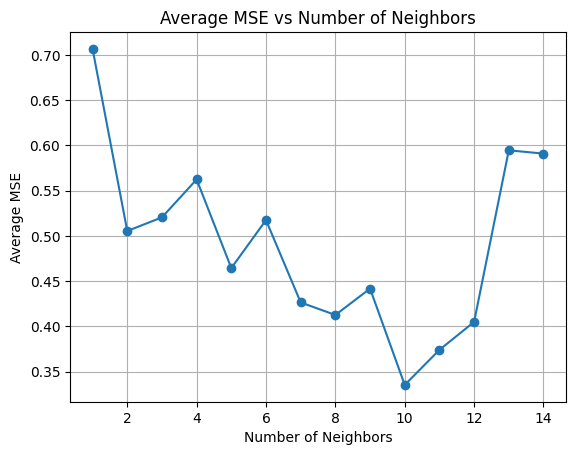

In [243]:
def calculate_average_mse(scaled_df, num_sections, num_neighbors, percent_to_remove=0.4):
	imputer = KNNImputer(n_neighbors=num_neighbors)
	percent_to_remove = 0.4
	# Convert the DataFrame to a NumPy array
	new_df = scaled_df[ind_first:ind_last]
	# Define the DataFrame section to work with
	section_length = len(new_df) // num_sections

	# Initialize a list to store MSE values for each section
	mse_values = []
	for i in range(num_sections):
		# create copy of original dataframe 
		dataframe = new_df.copy()

		start_index = i * section_length
		end_index = (i + 1) * section_length if i < num_sections - 1 else len(new_df)
		
		dataframe['ADOS_GOTHAM_SEVERITY'][start_index:end_index] = np.nan

		# impute the train scaled
		data_array_scaled = dataframe.values

		# Fit the imputer to the data and transform it
		imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

		# Convert the imputed NumPy array back to a DataFrame
		imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)

		

		test_scaled = new_df[start_index:end_index]
		#test_scaled = new_df[0:100]

		train_scaled = test_scaled.copy()
		# get labeled data

		# get random values to remove
		num_points_to_remove = int(len(train_scaled) * percent_to_remove)

		removed_indices = random.sample(range(1, len(train_scaled)), num_points_to_remove)


		# remove the values 
		train_scaled['ADOS_GOTHAM_SEVERITY'].iloc[removed_indices] = np.nan

		# # Check if all columns contain NaN values
		all_nan_columns = train_scaled.columns[train_scaled.isnull().all()]
			#print(all_nan_columns)
			# Replace the first value of each column with 0 if all values are NaN
		for col in all_nan_columns:
			train_scaled.at[train_scaled.index[0], col] = 0



		# impute the train scaled
		data_array_scaled = train_scaled.values

		# Fit the imputer to the data and transform it
		imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

		# Convert the imputed NumPy array back to a DataFrame
		imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)
		imputed_values = imputed_df_scaled['ADOS_GOTHAM_SEVERITY'][removed_indices]
		test_scaled.reset_index(drop=True, inplace=True)
		original_values = test_scaled['ADOS_GOTHAM_SEVERITY'][removed_indices]

		#accuracy = accuracy_score(original_values, imputed_values)
		# Calculate Mean Squared Error (MSE)
		mse = mean_squared_error(original_values, imputed_values)
		#print("Mean Squared Error:", mse)
		# Append MSE to the list
		mse_values.append(mse)
	# Calculate the average MSE across all sections
	average_mse = np.mean(mse_values)
	return average_mse 

avg_mse_list = []
neighbors_range = range(1,15)
for i in neighbors_range:
	avg_mse = calculate_average_mse(scaled_df, num_sections=5, num_neighbors=i)
	avg_mse_list.append(avg_mse)

# Plot the results
plt.plot(neighbors_range, avg_mse_list, marker='o')
plt.title('Average MSE vs Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Average MSE')
plt.grid(True)
plt.show()

### visual to see how many missing values there are 

539


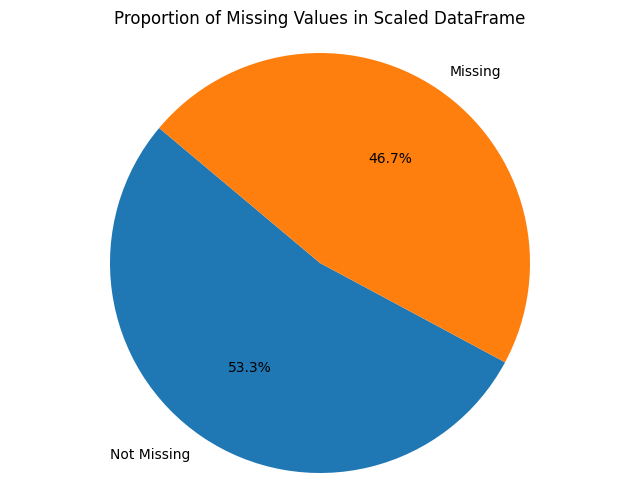

In [240]:
import matplotlib.pyplot as plt

# Calculate the proportion of missing values for each column
missing_proportion = (scaled_df.isnull().sum() > 0).value_counts()
print(len(scaled_df))
# Plotting
plt.figure(figsize=(8, 6))
plt.pie(missing_proportion, labels=['Not Missing', 'Missing'], autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Missing Values in Scaled DataFrame')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



In [258]:
dataframe = scaled_df.copy()
i = 1
section_length = 5
start_index = i * section_length
num_sections = 10
end_index = (i + 1) * section_length if i < num_sections - 1 else len(new_df)

dataframe['ADOS_GOTHAM_SEVERITY'][start_index:end_index] = np.nan
print(dataframe['ADOS_GOTHAM_SEVERITY'][start_index:end_index])
# impute the train scaled
data_array_scaled = dataframe.values

# Fit the imputer to the data and transform it
imputed_data_array_scaled = imputer.fit_transform(data_array_scaled)

# Convert the imputed NumPy array back to a DataFrame
imputed_df_scaled = pd.DataFrame(imputed_data_array_scaled, columns=scaled_df.columns)

print(imputed_df_scaled['ADOS_GOTHAM_SEVERITY'][start_index:end_index])


5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: ADOS_GOTHAM_SEVERITY, dtype: float64
5    7.111111
6    7.777778
7    6.111111
8    8.777778
9    7.555556
Name: ADOS_GOTHAM_SEVERITY, dtype: float64
